In [1]:
import numpy as np
import datetime as dt
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import sys
sys.path.append('D:\\gitCCA\\CESdesign\\py')
import CESfunctions_dev as cf

In [2]:
#files = glob.glob('D:\\CCA\\Avantes\\BBCEAS_Data\\202201_CCA\\*.csv')

df = pd.read_csv('D:\\CCA\\Avantes\\BBCEAS_Data\\202201_CCA\\CCA_20220125_M.csv')
df2= df[df.Parametro == "NO2"]
dates = []
for ele in df2.Date:
    try:
        dates.append(dt.datetime.strptime(ele,"%Y-%m-%d %H:%M"))
    except:
        ele2=ele.replace("24","00",1)
        dates.append(dt.datetime.strptime(ele2,"%Y-%m-%d %H:%M"))
        
ppbs = []
for ele in df2.RawValue:
    ppbs.append(ele)
    
with open("M2201251445.txt") as f:
    lines = f.readlines()

data=[]

for line in lines:
    a=line.strip('\n')
    data.append(a.split(' '))

dates2=[]
ppbs2=[]

for ele in data:
    dates2.append(dt.datetime.strptime(ele[0],"%Y/%m/%d-%H:%M:%S"))
    ppbs2.append(float(ele[1]))
    
ppbs3=np.array(ppbs2)

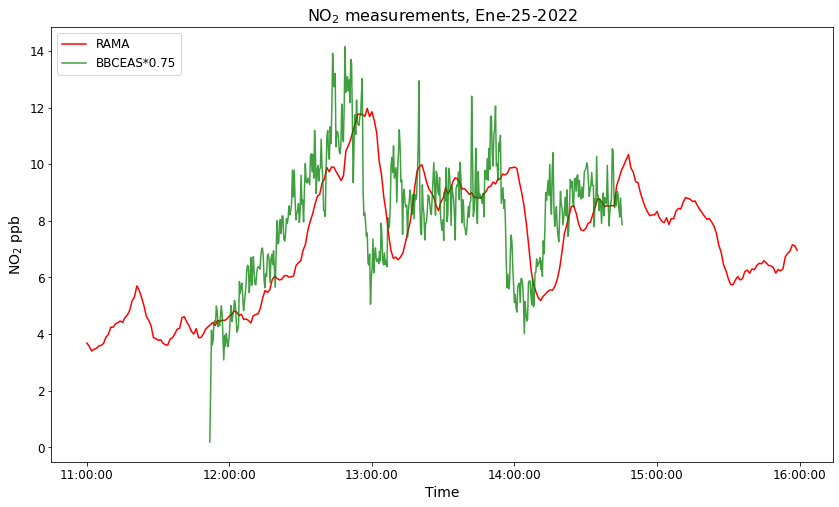

In [4]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates[600:900],ppbs[600:900],'-r',label='RAMA')
ax1.plot(dates2,ppbs3*.75,'-g',label='BBCEAS*0.75',alpha=0.75)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("NO$_2$ measurements, Ene-25-2022",size=16)
ax1.legend(fontsize=12, loc='upper left')
plt.savefig("Jan25.png")

In [6]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=445
upper_wavelength=459

sample = np.load('Isamples2201251445.npy')
background = np.loadtxt('Ib2201251150.txt')
#measurements = np.load('measurements2201211428.npy',allow_pickle=True)

reference1=np.load("NO2ref_AvSC_corr.npy")
#reference1=cf.ref_interpolate("NO2_AvSC_corr.npy",sample)
#### Getting or setting values for Reff
Reff = 0.99955
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
I_0 = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)


densities = []
densities2 = []


for i in range(1,len(line.T[:,0])):
    I_sample=np.copy(line[:,i]).reshape(len(line[:,i]),1)
    alphax = cf.extinction(I_sample,I_0,Reff,distance)
    ax,bx,cx = cf.fit_signal(alphax,ref1)
    densityx = cx
    densities2.append(densityx)
    
    I_sample=np.copy(line[:,i]).reshape(len(line[:,i]),1)
    ndensity = cf.recursive_fit(I_sample,I_0,Reff,distance,ref1,verbose=0)
    densities.append(ndensity)
conc = np.array(densities)
conc2 = np.array(densities2)

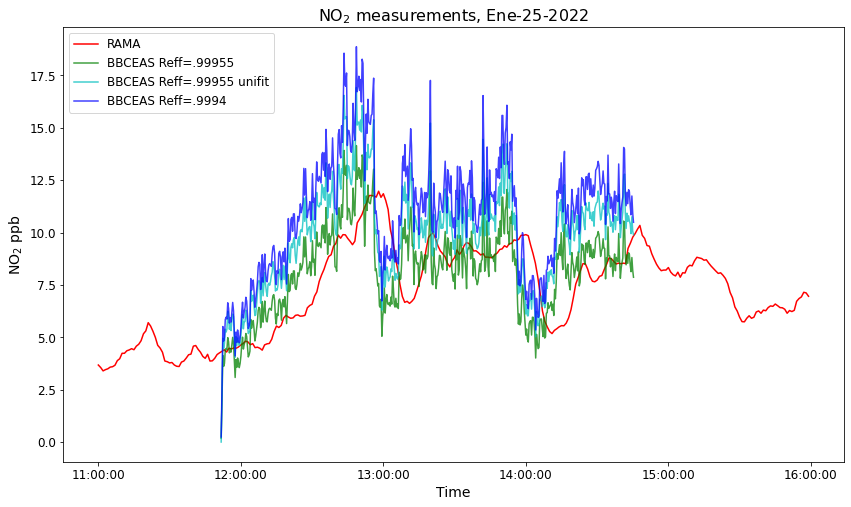

In [8]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates[600:900],ppbs[600:900],'-r',label='RAMA')
ax1.plot(dates2,conc/2.5e10,'-g',label='BBCEAS Reff=.99955 ',alpha=0.75)
ax1.plot(dates2,conc2/2.5e10,'-c',label='BBCEAS Reff=.99955 unifit',alpha=0.75)
ax1.plot(dates2,ppbs3,'-b',label='BBCEAS Reff=.9994',alpha=0.75)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("NO$_2$ measurements, Ene-25-2022",size=16)
ax1.legend(fontsize=12, loc='upper left')
plt.savefig("Jan25-2.png")

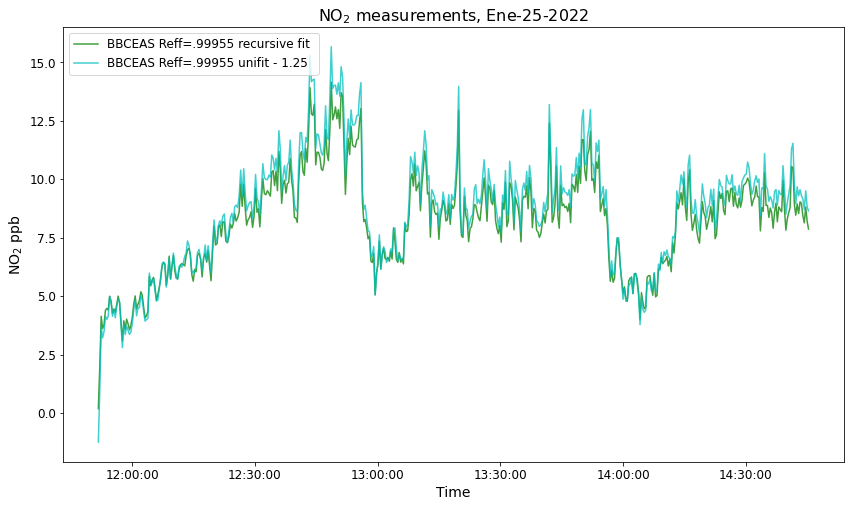

In [9]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates2,conc/2.5e10,'-g',label='BBCEAS Reff=.99955 recursive fit ',alpha=0.75)
ax1.plot(dates2,conc2/2.5e10-1.25,'-c',label='BBCEAS Reff=.99955 unifit - 1.25',alpha=0.75)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("NO$_2$ measurements, Ene-25-2022",size=16)
ax1.legend(fontsize=12, loc='upper left')

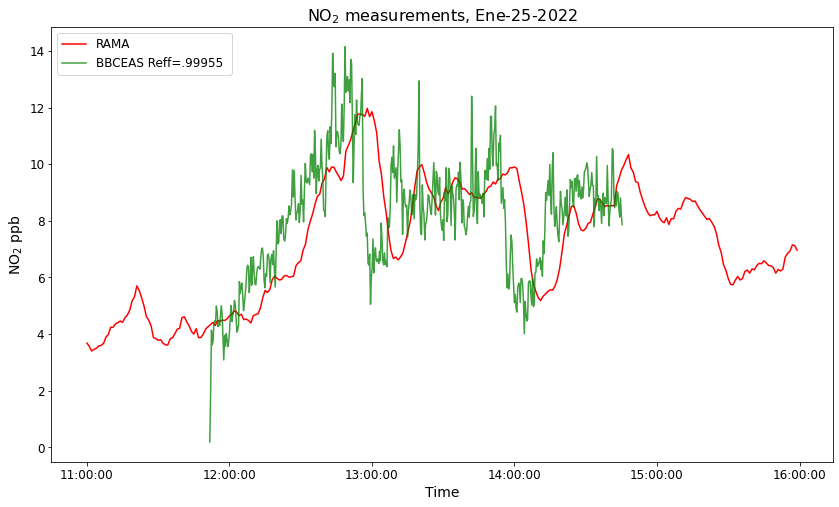

In [11]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates[600:900],ppbs[600:900],'-r',label='RAMA')
ax1.plot(dates2,conc/2.5e10,'-g',label='BBCEAS Reff=.99955 ',alpha=0.75)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("NO$_2$ measurements, Ene-25-2022",size=16)
ax1.legend(fontsize=12, loc='upper left')
plt.savefig("Jan25-3.png")

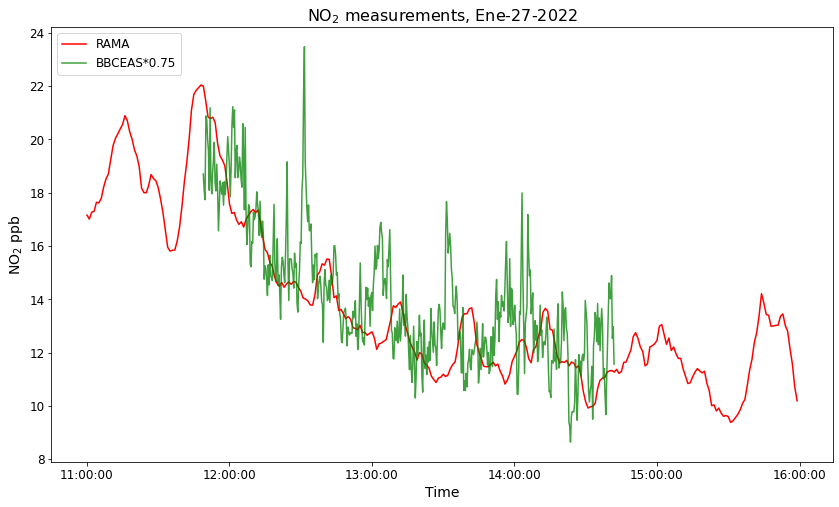

In [12]:
#files = glob.glob('D:\\CCA\\Avantes\\BBCEAS_Data\\202201_CCA\\*.csv')

df = pd.read_csv('D:\\CCA\\Avantes\\BBCEAS_Data\\Archive\\CCA_20220127_M.csv')
df2= df[df.Parametro == "NO2"]
dates = []
for ele in df2.Date:
    try:
        dates.append(dt.datetime.strptime(ele,"%Y-%m-%d %H:%M"))
    except:
        ele2=ele.replace("24","00",1)
        dates.append(dt.datetime.strptime(ele2,"%Y-%m-%d %H:%M"))
        
ppbs = []
for ele in df2.RawValue:
    ppbs.append(ele)
    
with open("M2201271441.txt") as f:
    lines = f.readlines()

data=[]

for line in lines:
    a=line.strip('\n')
    data.append(a.split(' '))

dates2=[]
ppbs2=[]

for ele in data:
    dates2.append(dt.datetime.strptime(ele[0],"%Y/%m/%d-%H:%M:%S"))
    ppbs2.append(float(ele[1]))
    
ppbs3=np.array(ppbs2)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates[600:900],ppbs[600:900],'-r',label='RAMA')
ax1.plot(dates2,ppbs3*.75,'-g',label='BBCEAS*0.75',alpha=0.75)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("NO$_2$ measurements, Ene-27-2022",size=16)
ax1.legend(fontsize=12, loc='upper left')
plt.savefig("Jan27.png")

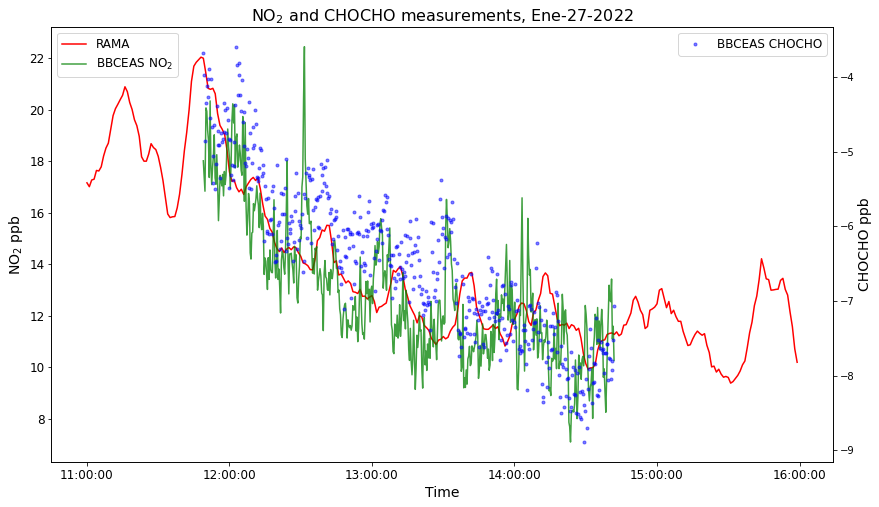

In [13]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=445
upper_wavelength=459

sample = np.load('Isamples2201271441.npy')
background = np.loadtxt('Ib2201271136.txt')
#measurements = np.load('measurements2201211428.npy',allow_pickle=True)

reference1=np.load("NO2_AvSC_corr.npy")
reference2=np.load("CHOCHO_AvSC_corr.npy")
#reference1=cf.ref_interpolate("NO2_AvSC_corr.npy",sample)
#### Getting or setting values for Reff
Reff = 0.99955
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
ref2=np.copy(reference2[minwave:maxwave,:])
I_0 = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)


densitiesa1 = []
densitiesa2 = []
densitiesb1 = []
densitiesb2 = []


for i in range(1,len(line.T[:,0])):
    I_sample=np.copy(line[:,i]).reshape(len(line[:,i]),1)
    alphax = cf.extinction(I_sample,I_0,Reff,distance)
    ax,bx,cx,dx = cf.fit_signal_2ref(alphax,ref1,ref2)
    density1x = cx
    density2x = dx
    densitiesa1.append(density1x)
    densitiesa2.append(density2x)
    
    ndensity1,ndensity2 = cf.recursive_fit_2ref(I_sample,I_0,Reff,distance,ref1,ref2,verbose=0)
    densitiesb1.append(ndensity1)
    densitiesb2.append(ndensity2)
conca1 = np.array(densitiesa1)
conca2 = np.array(densitiesa2)
concb1 = np.array(densitiesb1)
concb2 = np.array(densitiesb2)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates[600:900],ppbs[600:900],'-r',label='RAMA')
ax1.plot(dates2,concb1/2.5e10,'-g',label='BBCEAS NO$_2$',alpha=0.75)
ax2=ax1.twinx()
ax2.plot(dates2,concb2/2.5e10,'.b',label='BBCEAS CHOCHO',alpha=0.5)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax2.set_ylabel('CHOCHO ppb',size=14)
ax1.set_title("NO$_2$ and CHOCHO measurements, Ene-27-2022",size=16)
ax1.legend(fontsize=12, loc='upper left')
ax2.legend(fontsize=12, loc='upper right')
plt.savefig("Jan27-2.png")

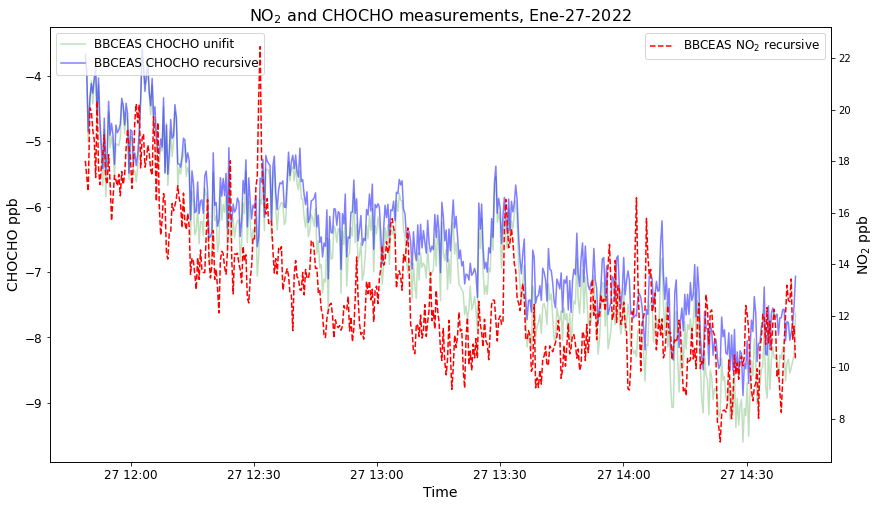

In [14]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates2,conca2/2.5e10,'-g',label='BBCEAS CHOCHO unifit',alpha=0.25)
ax1.plot(dates2,concb2/2.5e10,'-b',label='BBCEAS CHOCHO recursive',alpha=0.5)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('CHOCHO ppb',size=14)
ax1.set_title("NO$_2$ and CHOCHO measurements, Ene-27-2022",size=16)

ax2 = ax1.twinx()
ax2.plot(dates2,concb1/2.5e10,'--r',label='BBCEAS NO$_2$ recursive',alpha=1)
ax2.set_ylabel('NO$_2$ ppb',size=14)
ax1.legend(fontsize=12, loc='upper left')
ax2.legend(fontsize=12, loc='upper right')
plt.savefig("Jan27-3.png")

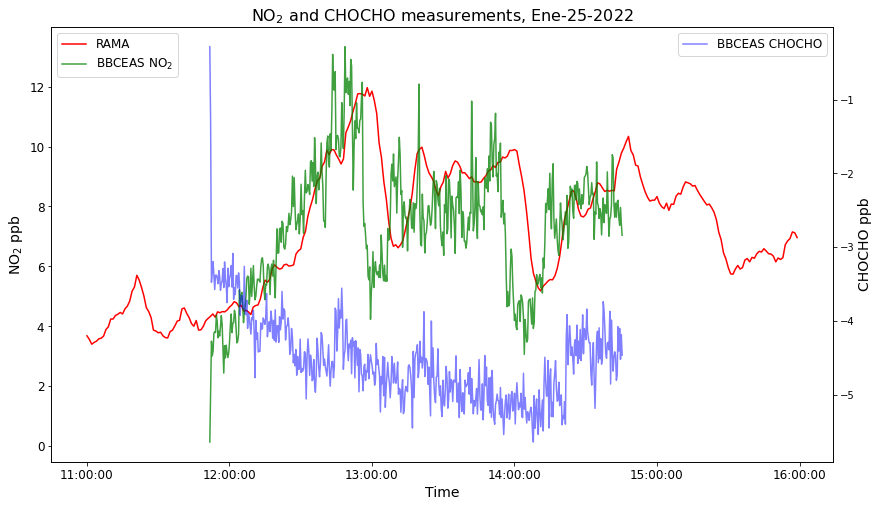

In [38]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=445
upper_wavelength=459

sample = np.load('Isamples2201251445.npy')
background = np.loadtxt('Ib2201251150.txt')
#measurements = np.load('measurements2201211428.npy',allow_pickle=True)

reference1=np.load("NO2_AvSC_corr.npy")
reference2=np.load("CHOCHO_AvSC_corr.npy")
#reference1=cf.ref_interpolate("NO2_AvSC_corr.npy",sample)
#### Getting or setting values for Reff
Reff = 0.99955
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
ref2=np.copy(reference2[minwave:maxwave,:])
I_0 = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)


densitiesa1 = []
densitiesa2 = []
densitiesb1 = []
densitiesb2 = []


for i in range(1,len(line.T[:,0])):
    I_sample=np.copy(line[:,i]).reshape(len(line[:,i]),1)
    alphax = cf.extinction(I_sample,I_0,Reff,distance)
    ax,bx,cx,dx = cf.fit_signal_2ref(alphax,ref1,ref2)
    density1x = cx
    density2x = dx
    densitiesa1.append(density1x)
    densitiesa2.append(density2x)
    
    ndensity1,ndensity2 = cf.recursive_fit_2ref(I_sample,I_0,Reff,distance,ref1,ref2,verbose=0)
    densitiesb1.append(ndensity1)
    densitiesb2.append(ndensity2)
conca1 = np.array(densitiesa1)
conca2 = np.array(densitiesa2)
concb1 = np.array(densitiesb1)
concb2 = np.array(densitiesb2)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates[600:900],ppbs[600:900],'-r',label='RAMA')
ax1.plot(dates2,concb1/2.5e10,'-g',label='BBCEAS NO$_2$',alpha=0.75)
ax2=ax1.twinx()
ax2.plot(dates2,concb2/2.5e10,'-b',label='BBCEAS CHOCHO',alpha=0.5)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax2.set_ylabel('CHOCHO ppb',size=14)
ax1.set_title("NO$_2$ and CHOCHO measurements, Ene-25-2022",size=16)
ax1.legend(fontsize=12, loc='upper left')
ax2.legend(fontsize=12, loc='upper right')

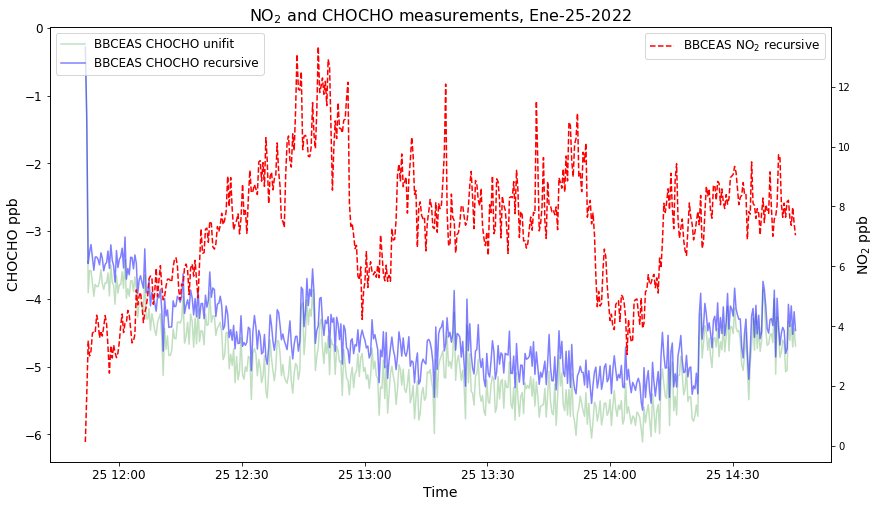

In [39]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates2,conca2/2.5e10,'-g',label='BBCEAS CHOCHO unifit',alpha=0.25)
ax1.plot(dates2,concb2/2.5e10,'-b',label='BBCEAS CHOCHO recursive',alpha=0.5)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('CHOCHO ppb',size=14)
ax1.set_title("NO$_2$ and CHOCHO measurements, Ene-25-2022",size=16)

ax2 = ax1.twinx()
ax2.plot(dates2,concb1/2.5e10,'--r',label='BBCEAS NO$_2$ recursive',alpha=1)
ax2.set_ylabel('NO$_2$ ppb',size=14)
ax1.legend(fontsize=12, loc='upper left')
ax2.legend(fontsize=12, loc='upper right')


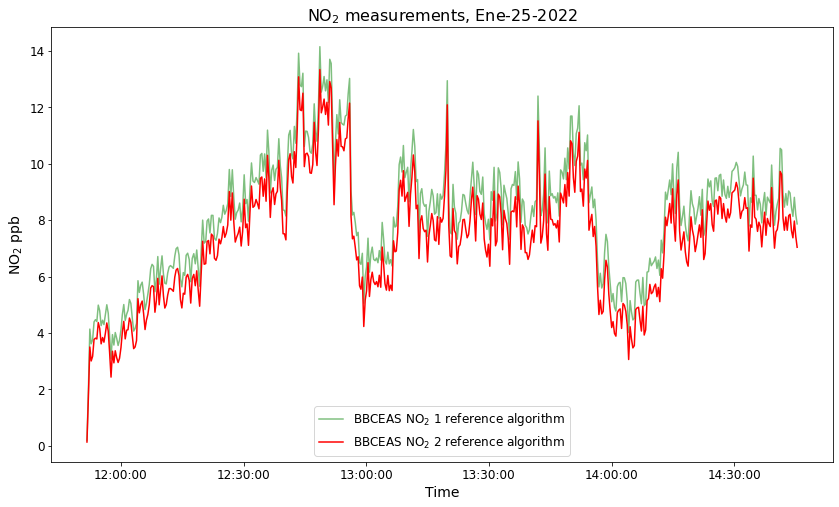

In [46]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(dates2,conc/2.5e10,'-g',label='BBCEAS NO$_2$ 1 reference algorithm',alpha=0.5)
ax1.plot(dates2,concb1/2.5e10,'-r',label='BBCEAS NO$_2$ 2 reference algorithm',alpha=1)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
ax1.tick_params(labelsize=12)
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("NO$_2$ measurements, Ene-25-2022",size=16)
ax1.legend(fontsize=12, loc='lower center')